# Central Limit Theorem

Recall that in earlier chapters we discussed the *sampling distribution* of a statistic.  We said it was the distribution (the histogram) of how all the values a statistic might take if we drew many many samples from a population.  Subsequently, we used the *bootstrap* as a method to obtain the sampling distribution when we only had *one* (large, random) sample. Now, we turn to the case of the *mean* and ask what its sampling distribution looks like.

As we will see, the sampling distribution of the sample mean has very special properties and characteristics.  In particular, under certain mild circumstances, it is *normally distributed*, no matter how the underling variable was distributed.  This is a surprising but important result, and is due to the **Central Limit Theorem** which we will discuss in more detail below.



## A non-Normal Population: Horse Prices

We begin with a data set on a population that is certainly not normally distributed. In particular, the prices of horses for sale online (via a specific website).  As we can see, prices start as low as zero but can go very high: it's a right skewed distribution, with a mean considerably higher than its median.

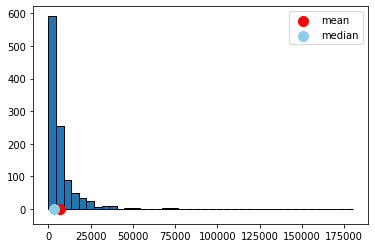

mean price: 7084.902777777777 dollars
median price: 3350.0 dollars


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

horses = pd.read_csv('data/horse_data.csv')
plt.hist(horses["price"], bins=40, ec="black")
plt.scatter(np.mean(horses["price"]), 0 ,  color='red', s=100, zorder=2, label="mean") 
plt.scatter(np.median(horses["price"]), 0 ,  color='skyblue', 
            s=100, zorder=2, label="median")           
plt.legend()
plt.show()
print("mean price:",np.mean(horses["price"]),"dollars")
print("median price:",np.median(horses["price"]),"dollars")

## Sampling Distribution of Mean Price
Let's build a sampling distribution of the mean price.  We will need a sample size $n$, to draw from the population and then we will build up a sampling distribution.  In particular, we will sample many (say, 10000) times from the population (each sample of size $=n$).  Because we will want to vary the sample size, let's write a single function to do this.

In [16]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(data, label, sample_size, repetitions):
    
    means = ([])

    for i in range(repetitions):
        new_sample = data[label].sample(n=sample_size, replace=True) 
        new_sample_mean = np.mean(new_sample)
        means = np.append(means, new_sample_mean)

    plt.hist(means, bins=20, ec="black")
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    plt.xlim(2000, 12000)
    plt.show()

    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(data[label]))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(data[label]))
    print("SD of sample means:", np.std(means))

The `simulate_sample_mean` function first sets up an array called `means` to store its results.  Then, for each one of the `repetitions`, it draws a sample of a pre-specified size of prices from the population data.  It takes the mean of that sample and records it every time.

Subsequently, it will plot those means, giving the sampling distribution.  It will then report the sample size, the population mean (the parameter we are trying to estimate), the average of the sample means (which will be relevant later), the population standard deviation and the standard deviation of the sampling distribution (the standard deviation of the sample means).  

Let's start with $n=100$.

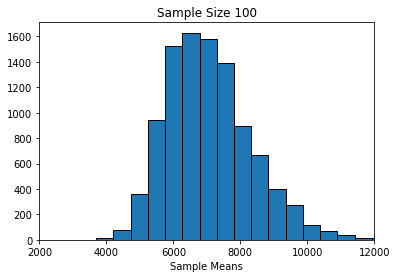

Sample size:  100
Population mean: 7084.902777777777
Average of sample means:  7071.010631
Population SD: 12690.621960971364
SD of sample means: 1269.1842363937049


In [17]:
simulate_sample_mean(horses, 'price', 100, 10000)


Alright, let's try $n=200$ each time:

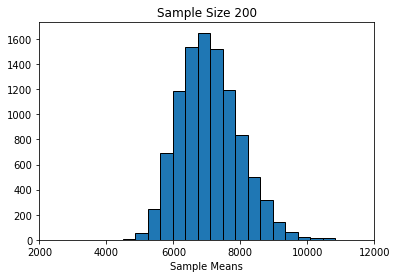

Sample size:  200
Population mean: 7084.902777777777
Average of sample means:  7085.0317854999985
Population SD: 12690.621960971364
SD of sample means: 897.0884341744128


In [18]:
simulate_sample_mean(horses, 'price', 200, 10000)


And finally, $n=1000$:

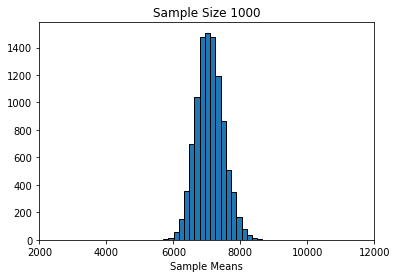

Sample size:  1000
Population mean: 7084.902777777777
Average of sample means:  7083.1715861
Population SD: 12690.621960971364
SD of sample means: 402.4892533111611


In [19]:
simulate_sample_mean(horses, 'price', 1000, 10000)


## Findings: Central Limit Theorem
First, we notice that as $n$ gets larger, the mean of the sampling distribution gets closer and closer to the mean of the population distribution.  This makes sense, insofar as we know large samples will generally lead to better estimates of the parameter.

We also see that the sampling distributions are approximately normal: they are symmetric, and unimodal around their means.  This is perhaps surprising, given that the underlying prices were *not* normally distributed. In fact, this is a very general result called the **Central Limit Theorem**.  It says that

> if we generate a *reasonably large number of samples*, from any population, for *large enough* sample sizes, the sampling distribution of the mean is *normally distributed*.

We will leave it a little vague as to how many samples one needs, and how large they need to be, but certainly once our sample size is above 30, we should see the result take hold.

The other thing we notice about the sampling distribution is that its mean is *equal to the population mean*.  So, the CLT implies that the average of the sampling distribution will be where the population mean is.  That will typically be very useful given we won't have the population mean, but *will* have the sampling distribution mean (say, via the bootstrap).

Finally, notice that as the sample sizes got larger, the standard deviation of the sampling distributions got smaller: it started out about 1300  ($n=100$), then fell to about  900 ($n=200$), and then to about 400 ($n=1000$).  A smaller standard deviation is good, because it implies that our estimate is on average closer to the truth (the population mean).  Again, this makes sense given what we know about larger samples.

But what is the exact relationship between the size of the underlying sample ($n$) and the standard deviation of the resulting sampling distribution?  

## Standard Error
To understand the relationship, note first a particular piece of terminology: we use the term **standard error** to mean

> the standard deviation of the sampling distribution of the sample mean

When it is "large" the sampling distribution is spread out; when it is small, the sampling distribution is "narrow". In particular, there is a *non*-linear relationship between $n$ and the standard error.  It looks something like this:

:::{figure-md} SE_plot
<img src="figures/SE_plot.png" alt="SE_plot" class="bg-white mb-1" width="300px">

Nonlinear relationship between the sample size ($n$) and the standard error
:::

So, the standard error falls very quickly at first as the sample gets larger.  But eventually, it begins to flatten off: it still continues to fall every time the sample increases, but the effect is not linear.  For example, if we multiple the sample by ten, we will not be able to decrease the standard error by ten. 

In fact, the standard error is increasing in the *square root* of the sample size. So, if you want to decrease your standard error by 10 times what it currently is, you need to increase your sample size by 100 times what it currently is (!)

In practical data science, this is good and bad news.  On the one hand, the bad news is that, while getting a larger sample leads to more accurate estimates, at a certain point it is *very hard* to get *much* better estimates.  That is, unless one has extraordinary resources to produce *much* larger samples.  On the other hand though, it is good news insofar as once you have a "fairly large" sample for an estimation problem, it does not help much to increase it.  

So what is "fairly large"?  It depends on the problem, but for many public opinion surveys, having a sample of around 1000-2000 people is enough to estimate the percentage of the population who support a given position (e.g. proportion voting Republican, proportion voting Democrat, proportion who are pro-Choice, proportion who are pro-gun restrictions etc) quite well. In particular, it is enough to get the confidence interval for a proportion estimated to be within $\pm 3$ or $\pm 4$ of the *true* percentage of people that support that position in the population.  Indeed, the harder problem is typically not getting enough respondents, but rather making sure they are "randomly" sampled correctly. 